# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 08.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
def dydt(t,y):
  return k*(y-Ta)
k=-0.06
Ta=25
t0=90
t=np.linspace(0,60,100)

In [2]:
sol=solve_ivp(dydt,t_span=(0,60),y0=[t0],t_eval=t)
#sol

No handles with labels found to put in legend.


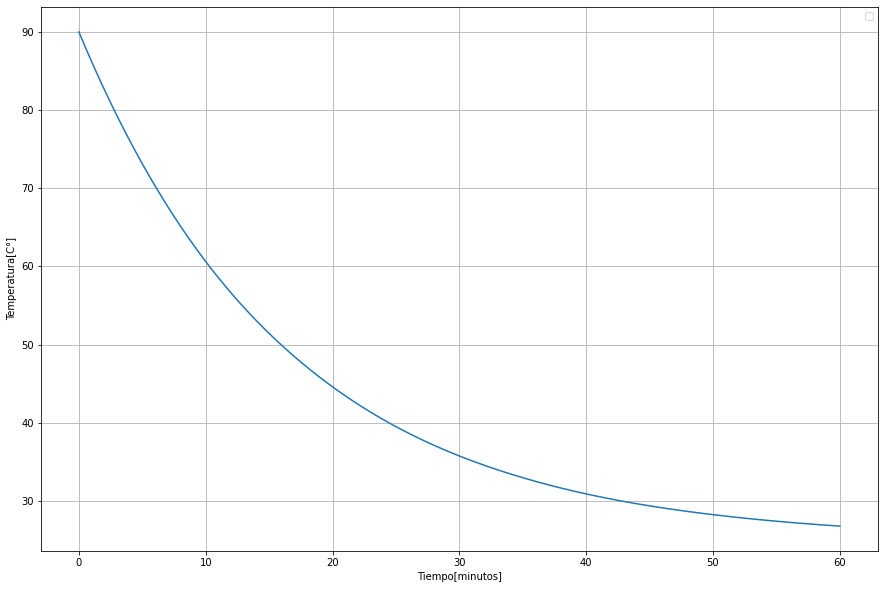

In [4]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(15,10))

ax.plot(t,sol.y[0])
ax.set_xlabel('Tiempo[minutos]')
ax.set_ylabel('Temperatura[C°]')
ax.grid()
ax.legend()

In [5]:
print("Los indices que corresponden a valores mayores que 70C° son:",np.argwhere(sol.y[0]>70).T)
print("Temperaturas en indices 10 y 11 son respectivamente:",[sol.y[0][10],sol.y[0][11]],'\n',"Timepos en indices 10 y 11 son respectivamente:",[t[10],t[11]])

Los indices que corresponden a valores mayores que 70C° son: [[ 0  1  2  3  4  5  6  7  8  9 10]]
Temperaturas en indices 10 y 11 son respectivamente: [70.15679530181957, 68.53853973682047] 
 Timepos en indices 10 y 11 son respectivamente: [6.0606060606060606, 6.666666666666667]


In [6]:
#Osea que si se desea beber el cafe a mas de 70C° debe hacerlo antes de los 6 minutos de servido.

## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones:

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

<img src="rabbits_foxes.png" width="400" />

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot con dos curvas: $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

In [7]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
def dsdt(s,x):
  x,y=s
  return[x*(alp-bet*y),-y*(gam-delt*x)]
x_0=4
y_0=2
s_0=(x_0,y_0)
delt=1
alp=1
gam=1
bet=1
t=np.linspace(0,30,60)

In [8]:
sol=odeint(dsdt,s_0,t)

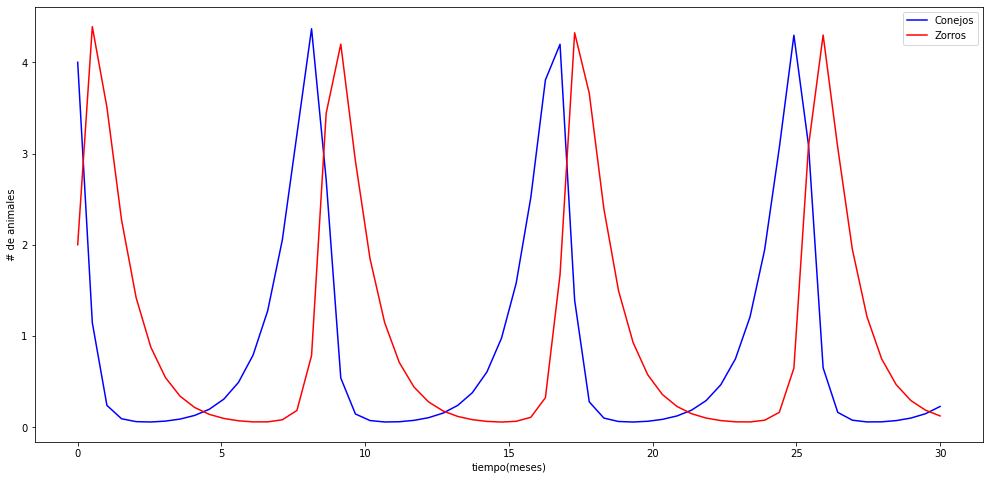

In [9]:
fig,ax=plt.subplots(1,1,figsize=(17,8))

ax.plot(t,sol.T[0],'b', label='Conejos')
ax.plot(t,sol.T[1],'r',label='Zorros')
ax.set_xlabel('tiempo(meses)')
ax.set_ylabel('# de animales')
ax.legend()

In [10]:
####COMENTARIOS DE 1ER GRAFICA###
# 1.Bajo las condiciones dadas parece que la poblacion de zorroz y conejos esta casi alineada, tanto asi que ambas especies logran los mismos
# minimos y maximos
## 2. La grafica es bastante delicada porque con medio cambiar las consntantes delta, alpha, gamma, o beta la grafica se distorciona mucho

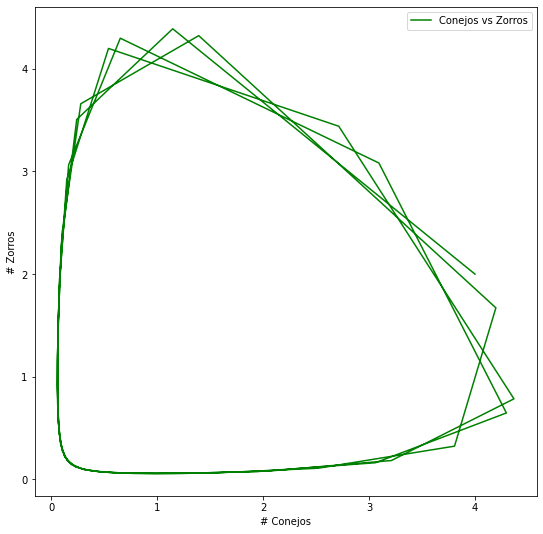

In [11]:
fig,ax=plt.subplots(1,1,figsize=(9,9))

ax.plot(sol.T[0],sol.T[1],'g', label='Conejos vs Zorros')
ax.set_xlabel('# Conejos')
ax.set_ylabel('# Zorros')
ax.legend()

In [12]:
##### COMENTARIOS DE 2DA GRAFICA ###
## 1. A ojo parece que el rango optimo para que ambas especies sobrevivan en que existan [2,3] zorros y [2,3] conejos
## 2. La grafica parece inestable en los estremos, osea cuando hay 4 zorros o 4 conejos

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 2.
Solution + presentation of the results	            (max 4.0p):	4.0p

Exercise 3.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 7.0p):	0.0p

Exercise 4 IVP.
Solution + presentation of the results	            (max 10.0p):  10.0p



- Total:                                              (max 10.0p):   10.0p (14.0)
```